In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:
- compare divergence
- compare Largest LE qr
- compare divergence trajectory of qr algorithm

## Parameters used for divergence and LLE qr:

In [2]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_both = "KS_31_01_2022"

In [3]:
# define all the simulations we want to test:

def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, 
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps, 
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point, 
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps, 
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32), 
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64), 
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4), 
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1), 
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2), 
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7), 
    }
    return ks_sim_dict

In [4]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    dims = parameters["dims"]
    L = parameters["L"]
    sim = parameters["sim"]
    return create_ks_sim_dict(dimensions=dims, system_size=L)[sim]

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    dims = parameters["dims"]
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.randn(Nens, dims)
    return starting_points

create_sim_func_keys = ["dims", "L", "sim"]
create_sp_func_keys = ["dims", "seed"]

## Exp1: Compare Divergence:

In [ ]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54],
    "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64", "rkstiff", "scipy32"],
    "seed": 100,
    
    "dt": [0.5],
    "tau": [100, 10000],
    "T": 75, 
    
    "eps": [1e-1, 1e-6]
}
# define Ndims and Nens
Ndims = 10
Nens = 30

# define saving:
save = True

div_name = "_div_dim54"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['dims', 'L', 'sim']
create_sp_func_keys ['dims', 'seed']
--------------------
--------------------
PARAMETERS: 
L 36
dims 54
sim ['normal', 'Bhatt', 'Pathak', 'rkstiffE1', 'numpy', 'numpy32', 'numpy64', 'rkstiff', 'scipy32']
seed 100
dt 0.5
tau [100, 10000]
T 75
eps [0.1, 1e-06]
--------------------
STARTING CALCULATIONS (36): 
....
CALC: 1/36
{'L': 36, 'dims': 54, 'sim': 'normal', 'seed': 100}, dt: 0.5, tau: 100, T: 75, eps: 0.1
N_ens: 1/30
timestep 150/150
N_ens: 2/30
timestep 150/150
N_ens: 3/30
timestep 150/150
N_ens: 4/30
timestep 150/150
N_ens: 5/30
timestep 150/150
N_ens: 6/30
timestep 150/150
N_ens: 7/30
timestep 150/150
N_ens: 8/30
timestep 150/150
N_ens: 9/30
timestep 150/150
N_ens: 10/30
timestep 150/150
N_ens: 11/30
timestep 150/150
N_ens: 12/30
timestep 150/150
N_ens: 13/30
timestep 150/150
N_ens: 14/30
timestep 150/150
N_ens: 15/30
timestep 150/150
N_ens: 16/30
timestep 150/150
N_ens: 17/30
timestep 150/150
N_ens: 18/30
timestep 

timestep 150/150
N_ens: 2/30
timestep 150/150
N_ens: 3/30
timestep 150/150
N_ens: 4/30
timestep 150/150
N_ens: 5/30
timestep 150/150
N_ens: 6/30
timestep 150/150
N_ens: 7/30
timestep 150/150
N_ens: 8/30
timestep 150/150
N_ens: 9/30
timestep 150/150
N_ens: 10/30
timestep 150/150
N_ens: 11/30
timestep 150/150
N_ens: 12/30
timestep 150/150
N_ens: 13/30
timestep 150/150
N_ens: 14/30
timestep 150/150
N_ens: 15/30
timestep 150/150
N_ens: 16/30
timestep 150/150
N_ens: 17/30
timestep 150/150
N_ens: 18/30
timestep 150/150
N_ens: 19/30
timestep 150/150
N_ens: 20/30
timestep 150/150
N_ens: 21/30
timestep 150/150
N_ens: 22/30
timestep 150/150
N_ens: 23/30
timestep 150/150
N_ens: 24/30
timestep 150/150
N_ens: 25/30
timestep 150/150
N_ens: 26/30
timestep 150/150
N_ens: 27/30
timestep 150/150
N_ens: 28/30
timestep 150/150
N_ens: 29/30
timestep 150/150
N_ens: 30/30
timestep 150/150
....
CALC: 18/36
{'L': 36, 'dims': 54, 'sim': 'numpy', 'seed': 100}, dt: 0.5, tau: 100, T: 75, eps: 1e-06
N_ens: 1/30
tim

## Exp2: LLE qr and trajectory divergence:

In [ ]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54],
    "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64", "rkstiff", "scipy32"],
    # "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64"],
    "seed": 100,
    
    "dt": [0.5],
    "tau": 100,
    "T": [5, 10, 20, 100], 
    
    "eps": [1e-6], 
    "Nqr": 5,
}

# define Nle and Nens
Nle = 1
Nens = 15

# return trajectory div:
traj_div=True

# define saving:
save = True
qr_name = "_qr3"
exp_name_qr = exp_name_both + qr_name

# other parameters:
get_info = True

out_qr = simt.compare_simulations_leqr(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_qr, Nens=Nens, Nle=Nle
                    , get_info=get_info, traj_div=True)

# Plotting:

### Plot results div:

In [5]:
#### if you want to LOAD results:
div_name = "_div3"
exp_name_div = exp_name_both + div_name
#### 

simt.load_info_file(prepath, exp_name_div)

{'Ndims': 10,
 'Nens': 30,
 'date': '31/01/2022',
 'exp_name': 'KS_31_01_2022_div3',
 'parameter_dict': {'L': [36],
  'T': [75],
  'dims': [54],
  'dt': [0.5],
  'eps': [1e-06],
  'seed': [100],
  'sim': ['normal',
   'Bhatt',
   'Pathak',
   'rkstiffE1',
   'numpy',
   'numpy32',
   'numpy64'],
  'tau': [10, 100, 10000]},
 'prefix': 'div',
 'time[min]': '37.973'}

lines: 7, cols: 3, rows: 1
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75
x_steps:  151
T:  75


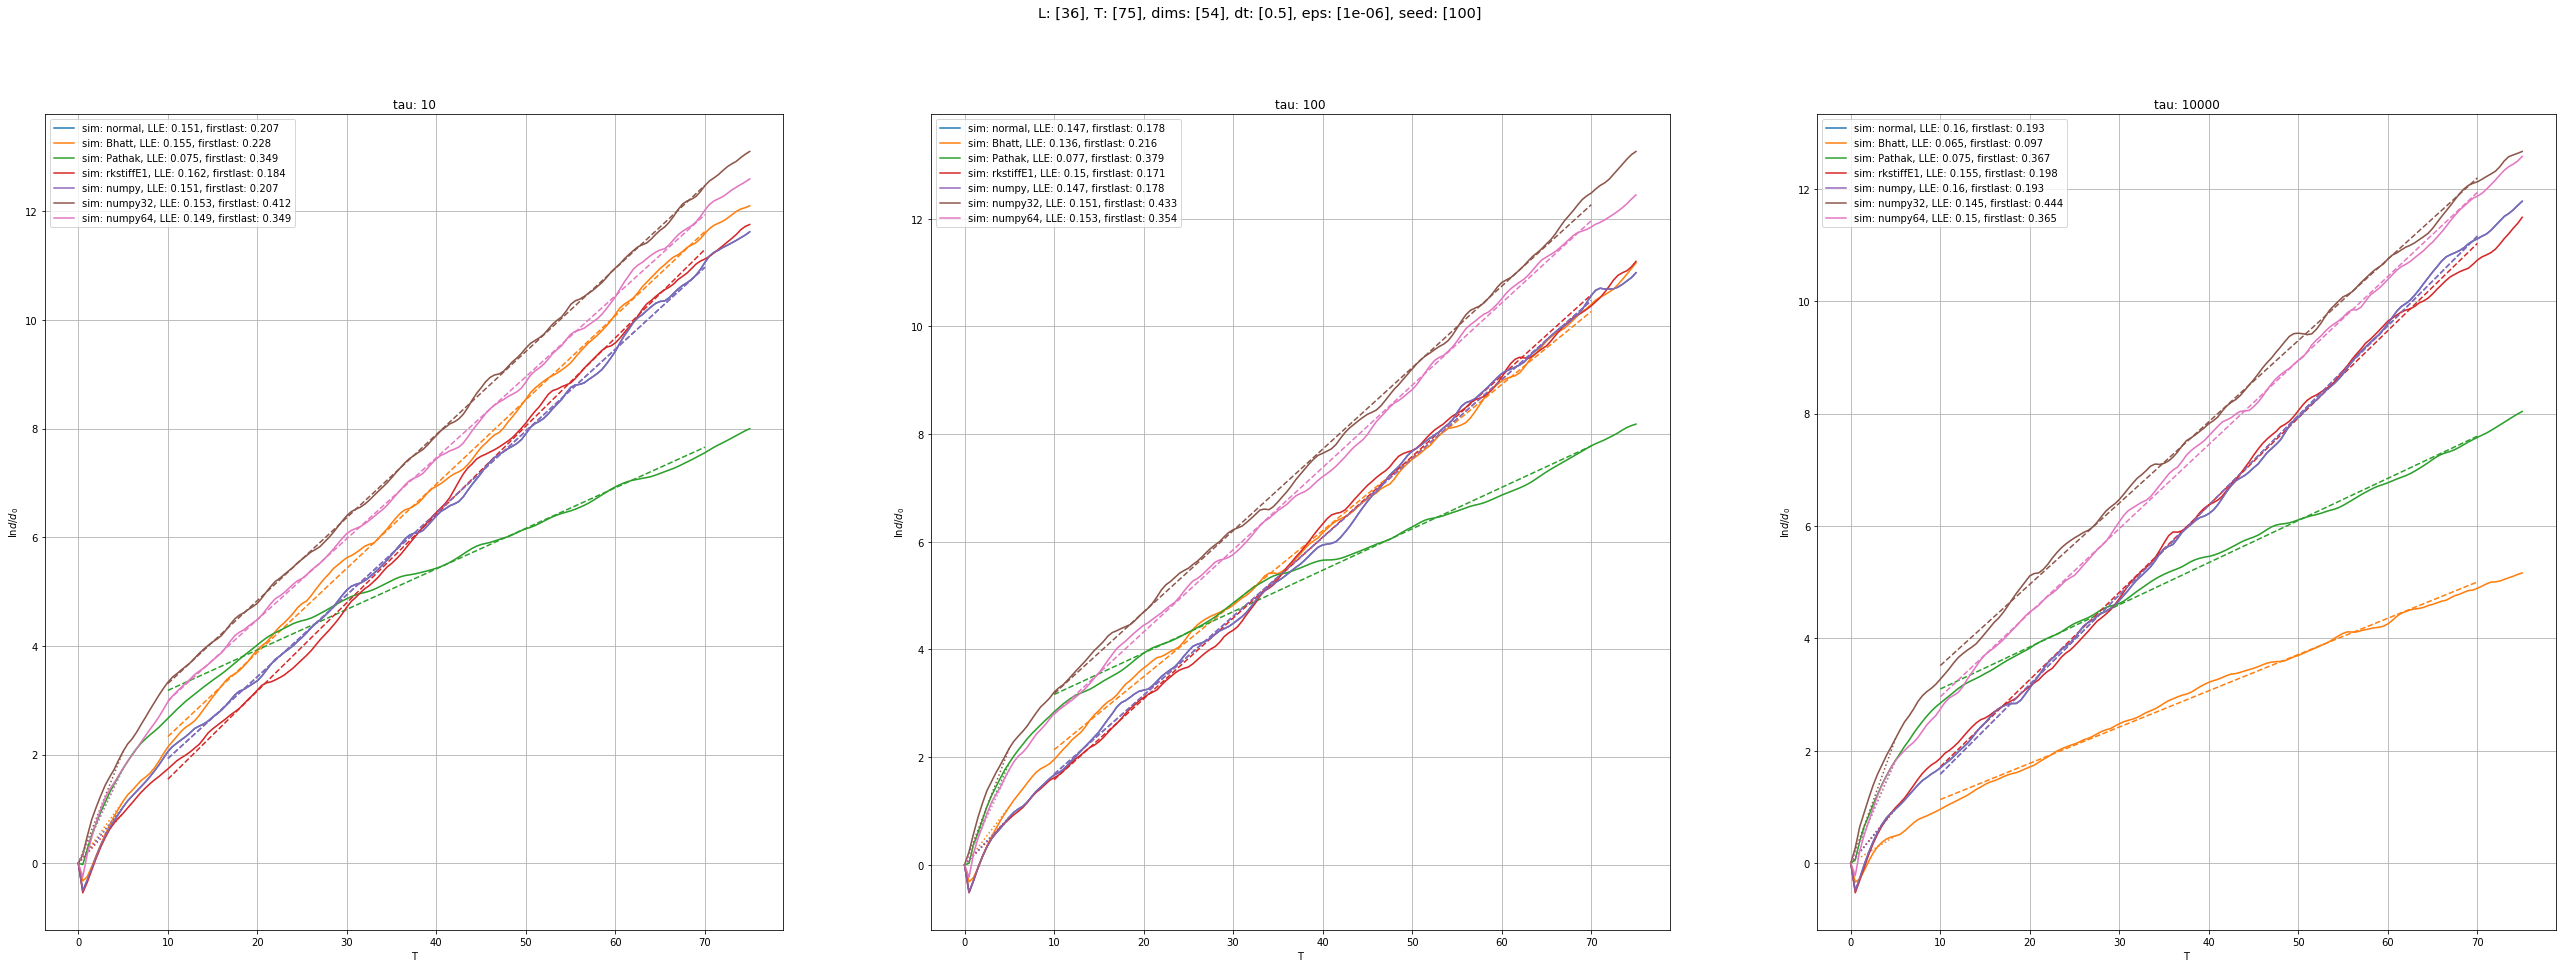

In [10]:
plot_func = simt.plot_div_file

zs = ["sim"]
xs = ["tau"]
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 10
t_max = 70

include_fit_qr = 1
t_min_qr = 0
t_max_qr = 5

subfigsize = (15, 15)
xlims = None # (0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

### Plot results qr:

In [7]:
#### if you want to LOAD results:
qr_name = "_qr3"
exp_name_qr = exp_name_both + qr_name
#### 

simt.load_info_file(prepath, exp_name_qr)

{'Nens': 15,
 'Nle': 1,
 'date': '31/01/2022',
 'exp_name': 'KS_31_01_2022_qr3',
 'parameter_dict': {'L': [36],
  'Nqr': [5],
  'T': [5, 10, 20, 100],
  'dims': [54],
  'dt': [0.5],
  'eps': [1e-06],
  'seed': [100],
  'sim': ['normal',
   'Bhatt',
   'Pathak',
   'rkstiffE1',
   'numpy',
   'numpy32',
   'numpy64'],
  'tau': [100]},
 'prefix': 'leqr',
 'prefix_div': 'qrdiv',
 'time[min]': '7.14',
 'traj_div': True}

lines: 7, cols: 4, rows: 1
latest LEs: [0.176]
latest LEs: [0.158]
latest LEs: [0.323]
latest LEs: [0.131]
latest LEs: [0.176]
latest LEs: [0.45]
latest LEs: [0.389]
latest LEs: [0.154]
latest LEs: [0.136]
latest LEs: [0.232]
latest LEs: [0.145]
latest LEs: [0.154]
latest LEs: [0.327]
latest LEs: [0.286]
latest LEs: [0.141]
latest LEs: [0.138]
latest LEs: [0.171]
latest LEs: [0.144]
latest LEs: [0.141]
latest LEs: [0.247]
latest LEs: [0.216]
latest LEs: [0.147]
latest LEs: [0.145]
latest LEs: [0.095]
latest LEs: [0.148]
latest LEs: [0.147]
latest LEs: [0.155]
latest LEs: [0.154]


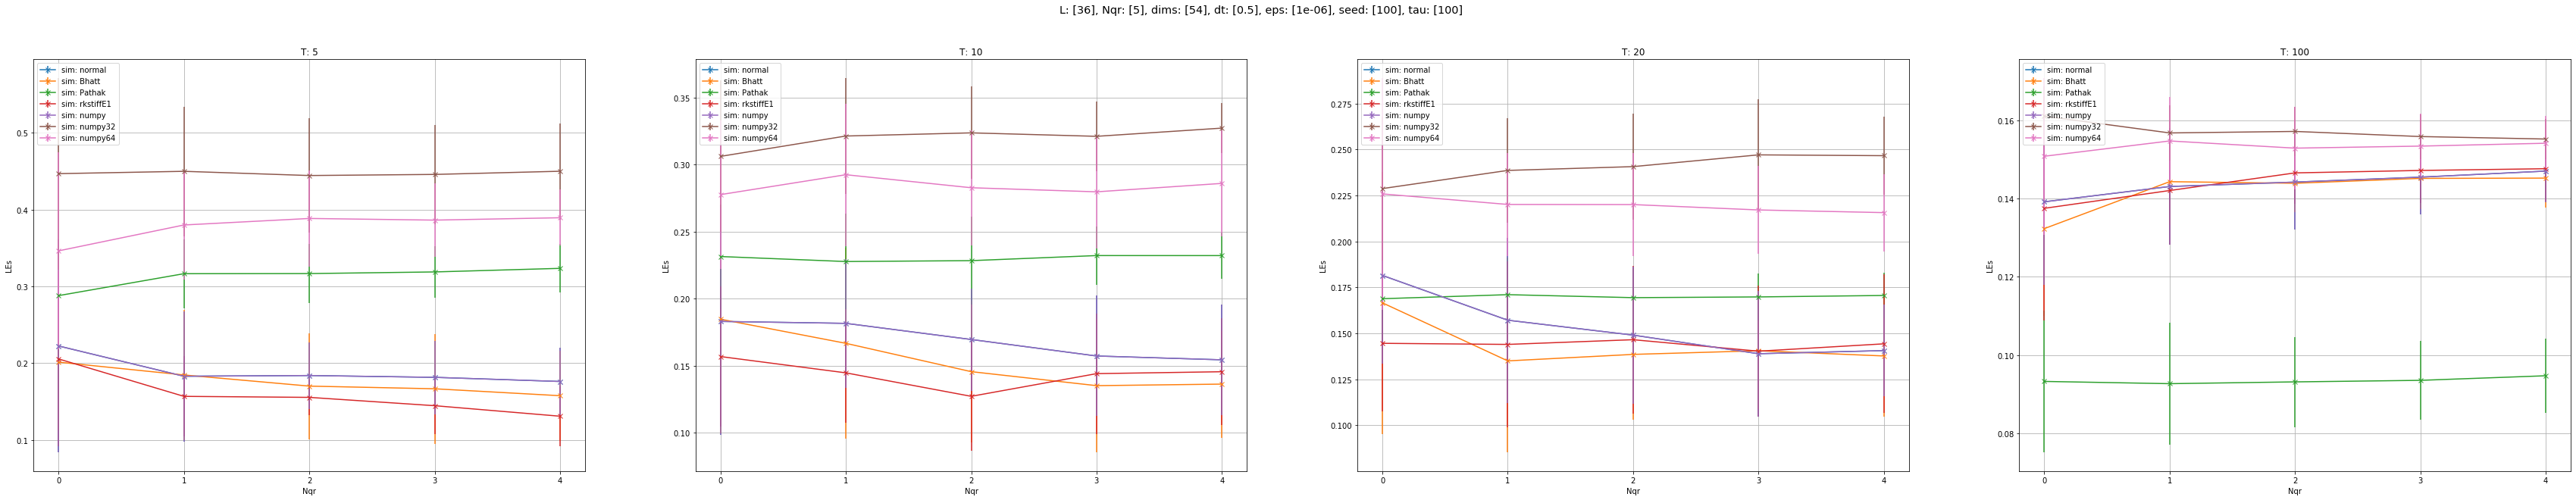

In [8]:
plot_func = simt.plot_leqr_file

zs = ["sim"]
xs = ["T"]
ys = []

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None
every_x_tick = True
subfigsize= (15, 10)

prefix="leqr"

subfigsize = (15, 10)
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, every_x_tick=every_x_tick,
                )

### Plot results qr trajectory divergence

lines: 1, cols: 4, rows: 7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.176
mean sloap: 0.158
mean sloap: 0.323
mean sloap: 0.131


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.176
mean sloap: 0.45
mean sloap: 0.389
mean sloap: 0.154


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.136
mean sloap: 0.232
mean sloap: 0.145


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.154
mean sloap: 0.327
mean sloap: 0.286


No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.141
mean sloap: 0.138


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.171
mean sloap: 0.144
mean sloap: 0.141


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.247
mean sloap: 0.216
mean sloap: 0.147


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.145
mean sloap: 0.095
mean sloap: 0.148


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean sloap: 0.147
mean sloap: 0.155
mean sloap: 0.154


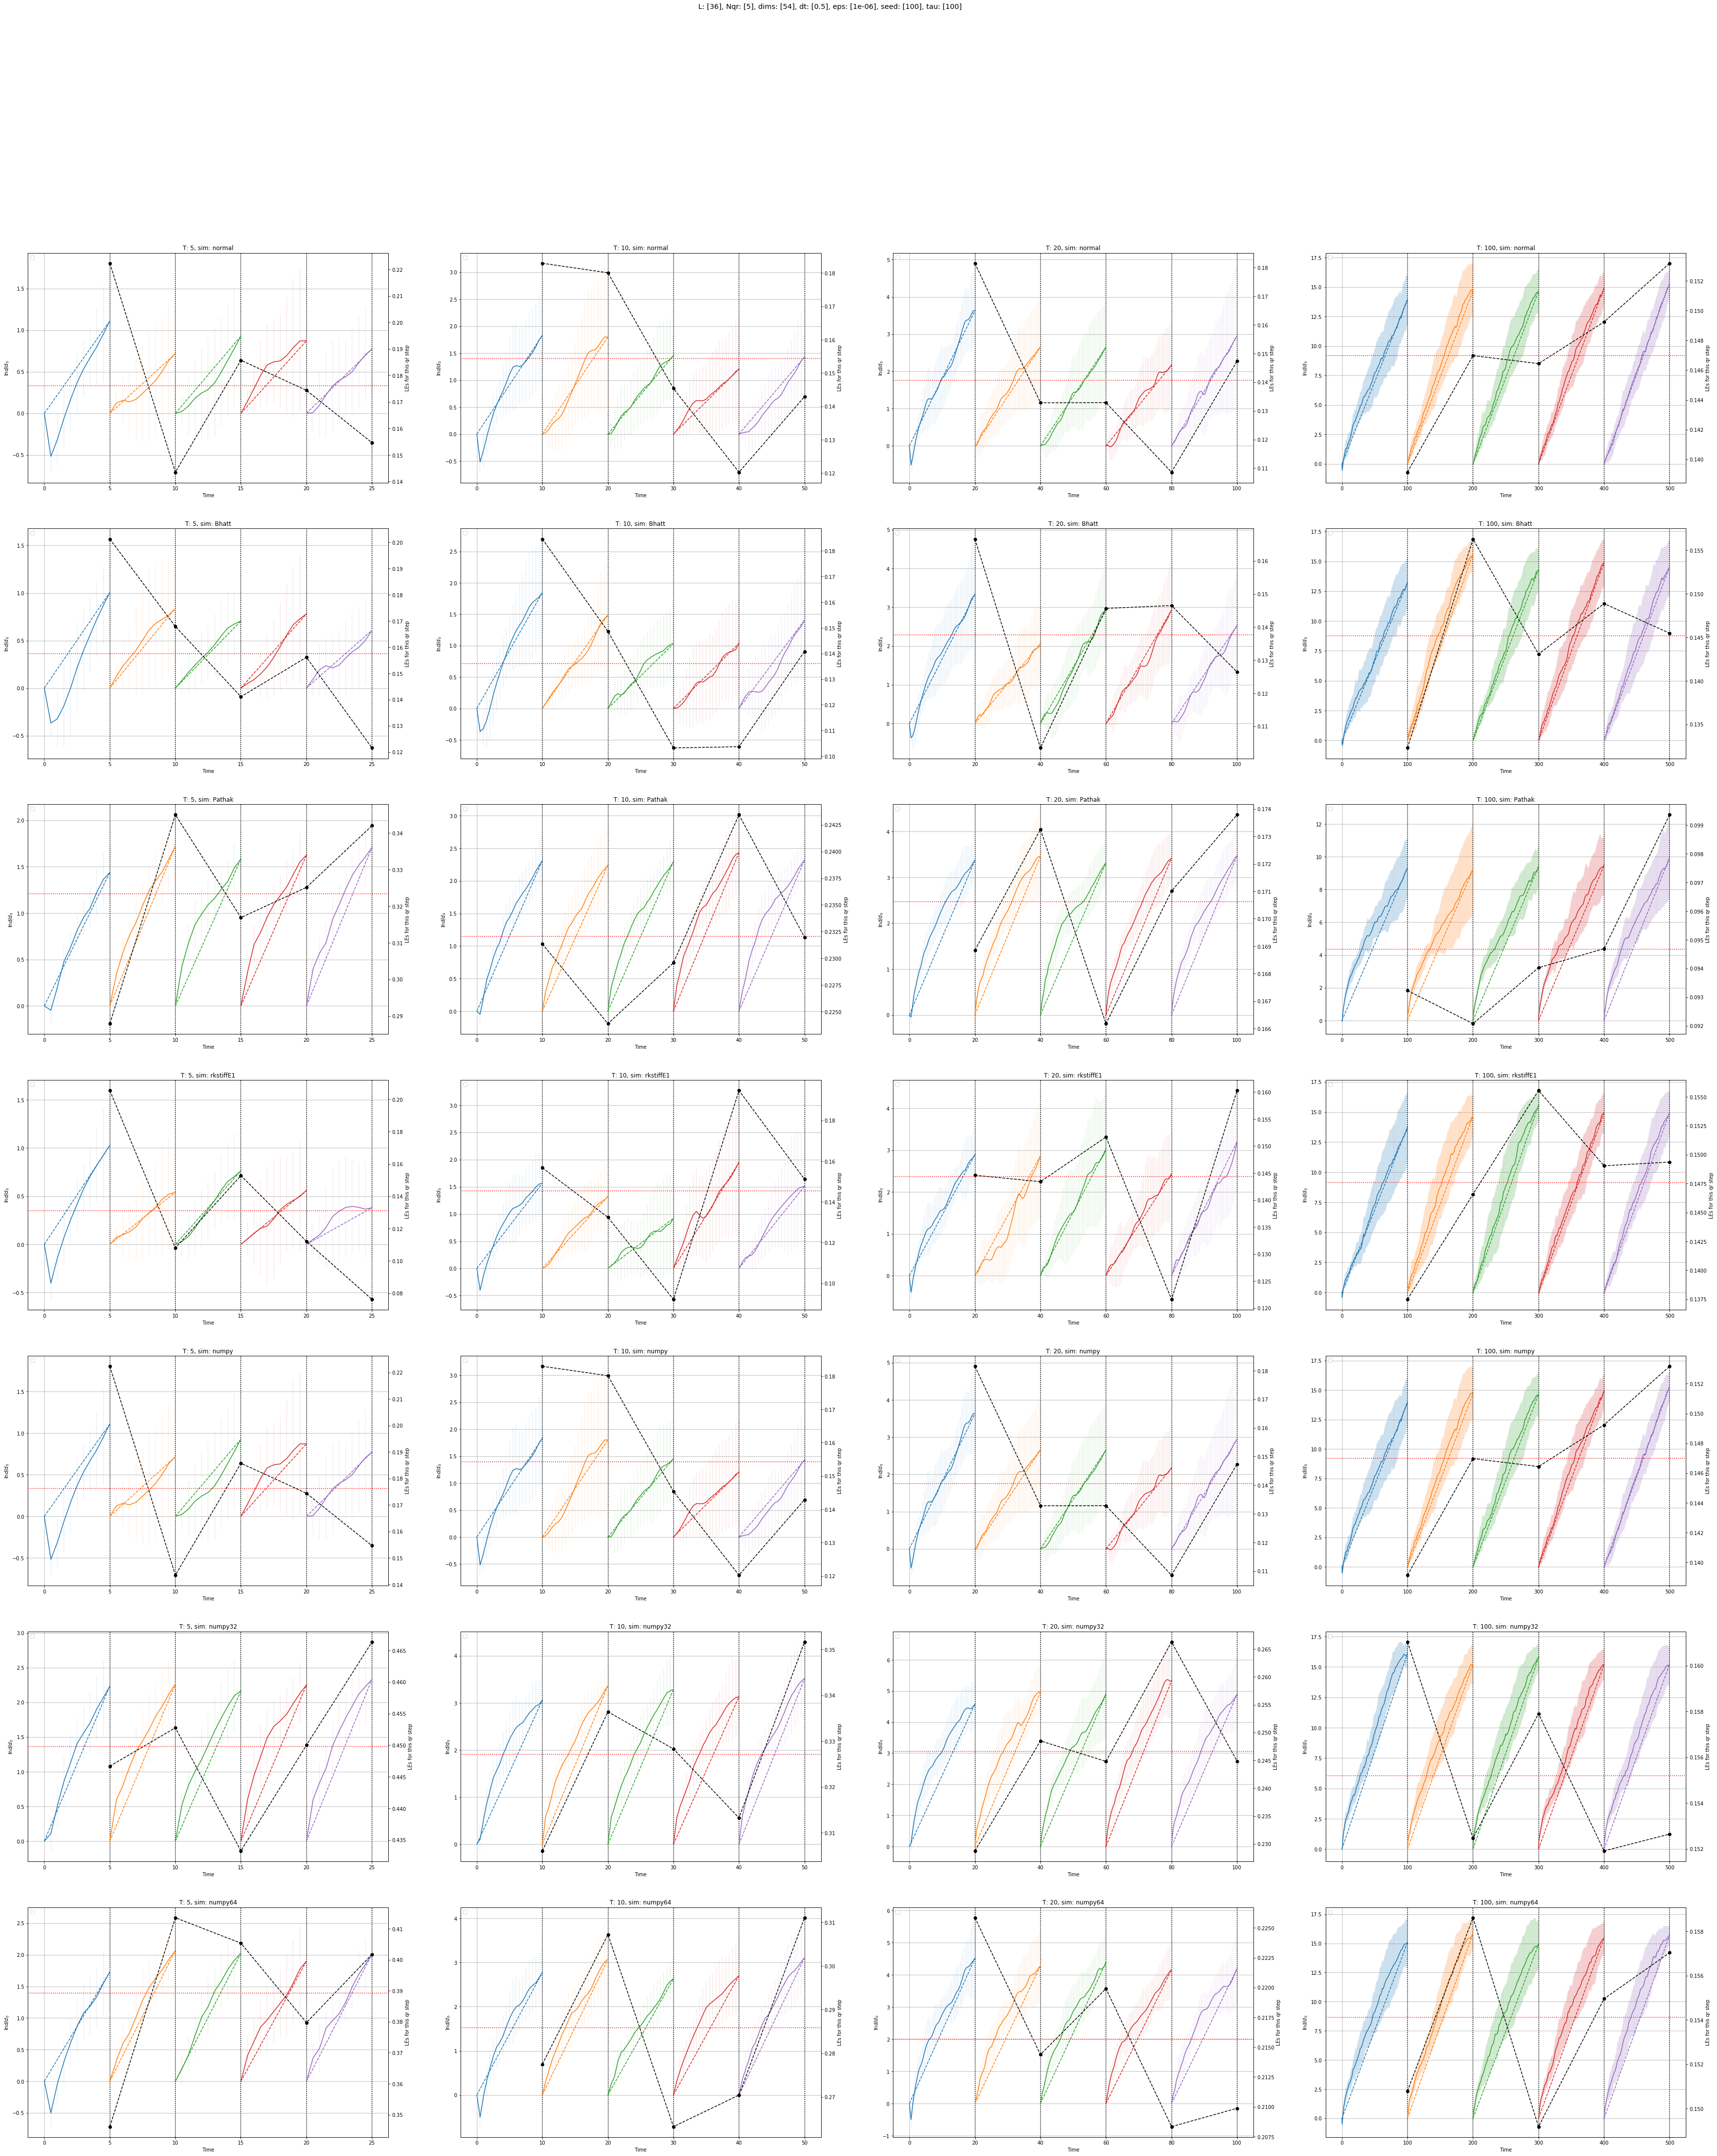

In [9]:
plot_func = simt.plot_qrdiv_file

zs = []
xs = ["T"]
ys = ["sim"]

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None

rel_dist=True
include_fit_qr=True

subfigsize = (15, 10)
prefix="qrdiv"
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix,  zs=zs, xs=xs, ys=ys,
                     subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, rel_dist=rel_dist, include_fit_qr=include_fit_qr
                )